In [20]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import pylab as pl

In [21]:
df_nba_stats = pd.read_csv('./results/nba_stats.csv')
df_nba_stats.columns

Index(['playerId', 'playerSlug', 'college', 'draftinfo', 'name', 'birthdate',
       'birthplace', 'year', 'height', 'weight', 'positionId', 'position',
       'teamId', 'team', 'status', 'salary', 'rankingSalary', 'experience',
       'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls',
       'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble',
       'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints',
       'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct',
       'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
       'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted',
       'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points',
       'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade',
       'threePointFieldGoalsAttempted', 'freeThrowsMade',
       'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks',
       'steals', 'blocks', 'totalPoints'],
      dtype='object')

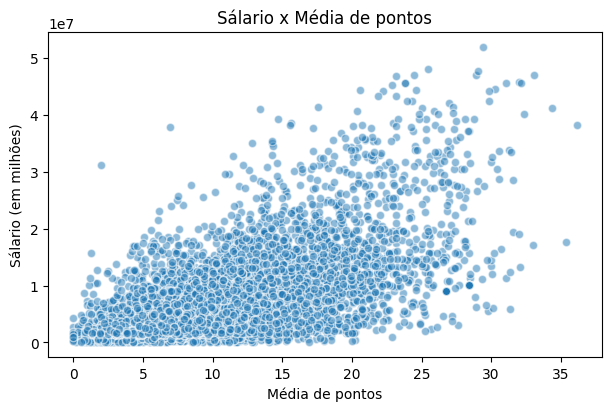

In [29]:
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
ax.scatter(
    df_nba_stats['avgPoints'],
    df_nba_stats['salary'],
    edgecolors='w',
    alpha=.5
)
plt.title('Sálario x Média de pontos')
plt.xlabel('Média de pontos')
plt.ylabel('Sálario (em milhões)')
plt.show()

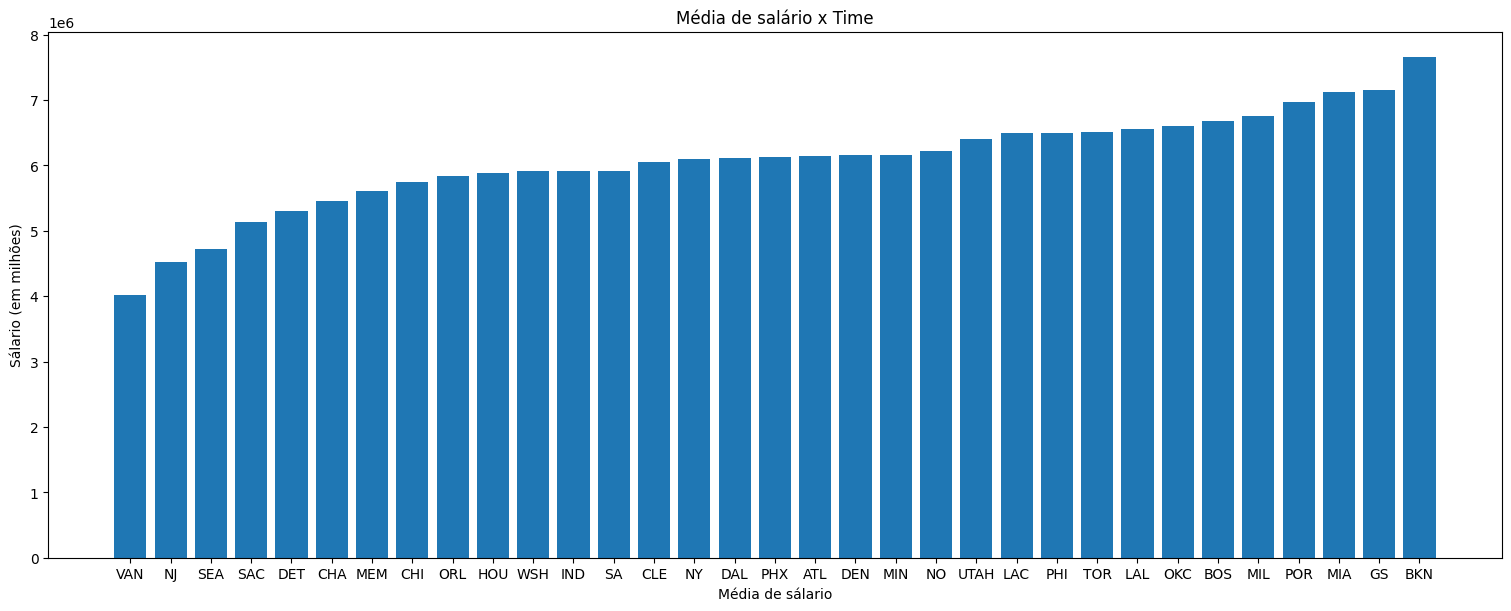

In [58]:
fig, ax = plt.subplots(figsize=(15, 6), layout='constrained')

nba_salary_by_team = df_nba_stats.groupby(
    'teamId')['salary'].mean().reset_index()

nba_salary_by_team_sorted = nba_salary_by_team.sort_values(
    by='salary', ascending=True)

ax.bar(
    nba_salary_by_team_sorted['teamId'],
    nba_salary_by_team_sorted['salary'],
)
    
plt.title('Média de salário x Time')
plt.xlabel('Média de sálario')
plt.ylabel('Sálario (em milhões)')
plt.show()